In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
class Descriper:
    def __init__(self,df:pd.DataFrame):
        self.df = df
    def analy(self):
        labels = self.df['label']
        predicts = self.df['predict']
        confusion = confusion_matrix(labels, predicts)
        return confusion, f1_score(labels, predicts, average='macro')



In [9]:
df = pd.read_csv(r'C:\Users\na062\Desktop\rokey_week4_ws\result.csv')
df.columns = ['label', 'predict']
df_new = df.replace({'label': {'normal': 0, 'abnormal': 1}, 'predict': {'normal': 0, 'abnormal': 1}})
descriper = Descriper(df_new)
confusion, f1 = descriper.analy()

C:\Users\na062\AppData\Local\Temp\ipykernel_9640\3638737871.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new = df.replace({'label': {'normal': 0, 'abnormal': 1}, 'predict': {'normal': 0, 'abnormal': 1}})


C:\Users\na062\AppData\Local\Temp\ipykernel_9640\595976498.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + predicted_labels)
C:\Users\na062\AppData\Local\Temp\ipykernel_9640\595976498.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


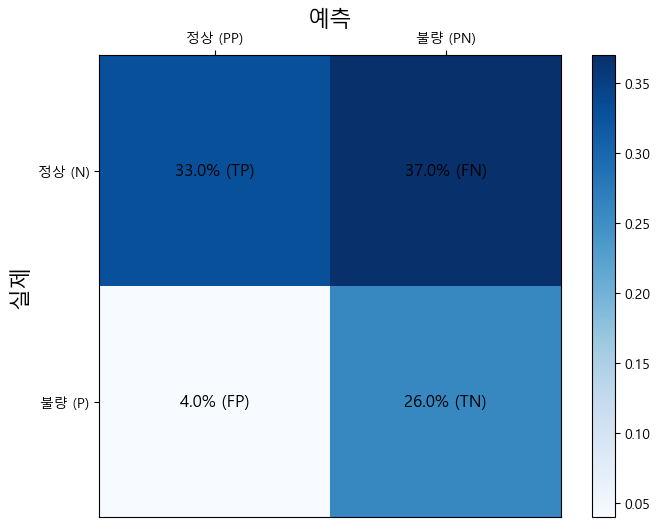

In [10]:
import seaborn as sns
# Set the tick labels for the heatmap
plt.rcParams['font.family'] = 'Malgun Gothic'
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(matrix: np.ndarray = None) -> None:
    # 행렬 관련 정보
    # 정상은 0, 불량은 1
    labels = ["정상 (N)", "불량 (P)"]
    predicted_labels = ["정상 (PP)", "불량 (PN)"]
    total = matrix.sum()
    matrix = matrix / total

    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(matrix, cmap=plt.cm.Blues)
    plt.colorbar(cax)

    # 라벨 추가
    plt.xlabel("")
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    plt.xlabel("예측",fontsize=16)
    plt.ylabel("실제",fontsize=16)
    ax.set_xticklabels([''] + predicted_labels)
    ax.set_yticklabels([''] + labels)
    # 텍스트로 값 표시
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            text = f"{matrix[i, j]*100:.1f}% "+f"({'TP' if i == 0 and j == 0 else 'FN' if i == 0 and j == 1 else 'FP' if i == 1 and j == 0 else 'TN'})"
            
            ax.text(j, i, text, va='center', ha='center', fontsize=12, color="black")

    plt.show()

# 실행
plot_confusion_matrix(confusion)


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def create_confusion_metrics_sklearn(label, predict):
    # Confusion Matrix
    cm = confusion_matrix(label, predict)
    tp, fp, fn, tn = cm.ravel()

    # Metrics Calculation
    accuracy = accuracy_score(label, predict)
    precision = precision_score(label, predict, zero_division=0)
    recall = recall_score(label, predict, zero_division=0)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = f1_score(label, predict, zero_division=0)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    # Create DataFrame
    confusion_data = pd.DataFrame({
        "Metric": [
            "True Positive (TP)", "False Positive (FP)", 
            "False Negative (FN)", "True Negative (TN)", 
            "Accuracy", "Precision", "Recall", 
            "Specificity", "F1 Score", 
            "False Positive Rate (FPR)", "False Negative Rate (FNR)"
        ],
        "Value": [
            tp, fp, fn, tn, 
            accuracy, precision, recall, 
            specificity, f1, 
            fpr, fnr
        ]
    })

    return confusion_data

de = create_confusion_metrics_sklearn(df_new['label'], df_new['predict'])
de.to_csv(r'C:\Users\na062\Desktop\rokey_week4_ws\결과3.xlsx', index=False)
de

,Metric,Value
0,True Positive (TP),33.000000
1,False Positive (FP),37.000000
2,False Negative (FN),4.000000
3,True Negative (TN),26.000000
4,Accuracy,0.590000
5,Precision,0.412698
6,Recall,0.866667
7,Specificity,0.412698
8,F1 Score,0.559140
9,False Positive Rate (FPR),0.587302
